In [1]:
######################################     Modules     #######################################
# MODULES
import sys
from time import process_time
import pickle
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact

sys.path.append('../.')
import verbose_module
sys.path.append('../../../.')
import pIRPgym

path = '/Users/juanbeta/My Drive/Research/Supply Chain Analytics/pIRPgym/'
experiments_path = '/Users/juanbeta/My Drive/Research/Supply Chain Analytics/Experiments/Flower Agent/'

sizes = [5,10,15,20,30,None]

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-11


# Instance Visualization

### Supplier Availability

In [2]:
def plot_distributions(size,indicator):
    with open(experiments_path+f'M{size}.pkl', 'rb') as file:
        data = pickle.load(file)
    inst_gen = data[2]
    if indicator=='Availability':
        pIRPgym.Visualizations.RoutingV.plot_supplier_distributions(inst_gen.q_parameters)
    else:
        pIRPgym.Visualizations.RoutingV.plot_supplier_distributions(inst_gen.p_parameters)

interact(plot_distributions,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         indicator=widgets.Dropdown(options=['Availability','Prices'],value='Availability',description='Indicator:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.plot_distributions(size, indicator)>

### Supplier Locations

In [3]:
def plot_locations(size):
    with open(experiments_path+f'M{size}.pkl', 'rb') as file:
        data = pickle.load(file)
    inst_gen = data[2]
    pIRPgym.Visualizations.RoutingV.render_routes(inst_gen,[])

interact(plot_locations,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.plot_locations(size)>

# Flower Agent

### N Table

In [8]:
def plot_n_table(size,solution):
    with open(experiments_path+f'M{size}-2.pkl', 'rb') as file:
        _,_,inst_gen,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.bar_plot(FlowerAgent.n_table)
    print('\n')
    pIRPgym.Visualizations.RoutingV.plot_service_levels_scatter(FlowerAgent.metrics)

interact(plot_n_table,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
         solution=widgets.Dropdown(options=range(1,26),value=1,description='Routes:'))


interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.plot_n_table(size, solution)>

In [11]:
with open(experiments_path+f'M10-2.pkl', 'rb') as file:
    _,_,inst_gen,FlowerAgent = pickle.load(file)
print(FlowerAgent.routes)

[[[0, 5, 7, 8, 9, 3, 0]], [[0, 8, 3, 5, 7, 9, 0]], [[0, 2, 7, 8, 9, 0]], [[0, 9, 7, 2, 8, 0]], [[0, 6, 0], [0, 9, 7, 10, 4, 3, 0]], [[0, 6, 4, 10, 7, 3, 9, 0]], [[0, 8, 7, 0]], [[0, 9, 3, 5, 1, 10, 2, 4, 6, 8, 0]], [[0, 9, 7, 8, 0]], [[0, 8, 7, 9, 0]], [[0, 8, 7, 9, 2, 0]], [[0, 8, 6, 3, 7, 9, 0]], [[0, 8, 6, 5, 7, 9, 0]], [[0, 4, 8, 6, 7, 0]], [[0, 8, 6, 4, 7, 0]], [[0, 8, 6, 4, 10, 3, 7, 0]], [[0, 8, 6, 4, 10, 7, 3, 0]], [[0, 3, 7, 2, 9, 5, 0]], [[0, 9, 7, 5, 2, 3, 0]], [[0, 8, 1, 7, 2, 0]], [[0, 8, 2, 1, 7, 0]], [[0, 9, 7, 8, 2, 1, 0]], [[0, 9, 7, 1, 2, 8, 0]], [[0, 7, 9, 2, 0]], [[0, 9, 7, 2, 0]]]


### Visualize routes

In [5]:
def render_routes(size,solution):
    with open(experiments_path+f'M{size}.pkl', 'rb') as file:
        _,_,inst_gen,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.render_routes(inst_gen,FlowerAgent.routes[solution])

interact(render_routes,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'),
                    solution=widgets.Dropdown(options=range(1,26),value=1,description='Routes:'))

interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.render_routes(size, solution)>

In [6]:
def plot_service_levels(size):
    with open(experiments_path+f'M{size}.pkl', 'rb') as file:
        _,_,_,FlowerAgent = pickle.load(file)
    pIRPgym.Visualizations.RoutingV.plot_service_levels_scatter(FlowerAgent.metrics)

interact(plot_service_levels,size=widgets.Dropdown(options=sizes,value=10,description='Inst. size:'))


interactive(children=(Dropdown(description='Inst. size:', index=1, options=(5, 10, 15, 20, 30, None), value=10…

<function __main__.plot_service_levels(size)>

### Service Level

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_service_levels_scatter(solution_data):
    """
    Plot a scatter plot for two service level types across different solutions.

    Parameters:
    - solution_data (list of tuples): Each tuple contains the service level values for both types in a solution.

    Returns:
    None
    """
    solution_data = [(obs[1],obs[2]) for obs in solution_data]
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a DataFrame for seaborn plotting
    df = pd.DataFrame(solution_data, columns=['Service Level Type 1', 'Service Level Type 2'])

    # Plot the scatter plot with consistent colors for each solution
    for i, solution in enumerate(solution_data):
        sns.scatterplot(x='Service Level Type 1', y='Service Level Type 2', data=pd.DataFrame([solution], columns=df.columns),
                        label=f'Flower {i + 1}', s=100, ax=ax)

    # Set labels and title
    ax.set_xlabel('Service Level')
    ax.set_ylabel('Dynamic Service Level')
    ax.set_title('Mean Service Levels Across Flower')

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    ax.legend(title='Flowers', loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

plot_service_levels_scatter(FlowerAgent.metrics)

NameError: name 'FlowerAgent' is not defined

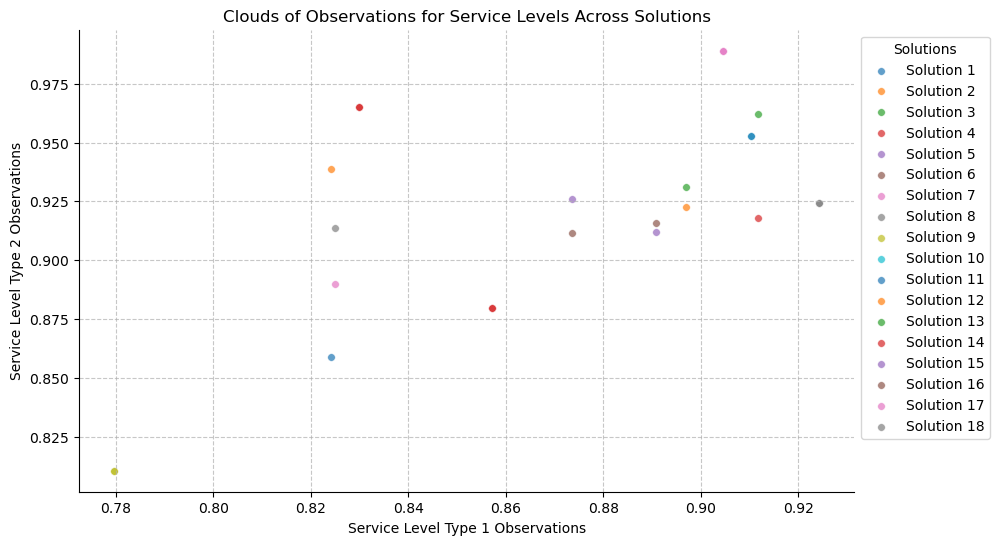

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_service_levels_clouds(solution_data):
    """
    Plot clouds of observations for two service level types across different solutions.

    Parameters:
    - solution_data (list of tuples): Each tuple contains two lists of observations for the two service level types in a solution.

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot clouds of observations for each solution
    for i, (service_level1, service_level2) in enumerate(solution_data):
        sns.scatterplot(x=service_level1, y=service_level2, label=f'Solution {i + 1}', s=30, alpha=0.7, ax=ax)

    # Set labels and title
    ax.set_xlabel('Service Level Type 1 Observations')
    ax.set_ylabel('Service Level Type 2 Observations')
    ax.set_title('Clouds of Observations for Service Levels Across Solutions')

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    ax.legend(title='Solutions', loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

# Example usage:
solution_data = [[[0.8241916171304159], [0.8589395115387264]],
 [[0.8241916171304159], [0.938921888603793]],
 [[0.9116828360822231], [0.9621497868923814]],
 [[0.9116828360822231], [0.917991204933493]],
 [[0.8735607721490614], [0.9261716049962935]],
 [[0.8735607721490614], [0.9114593758423637]],
 [[0.8249790314169273], [0.8900214030060469]],
 [[0.8249790314169273], [0.9135395318866607]],
 [[0.7796769106176211, 0.7796769106176211],
  [0.8104940113379655, 0.8104940113379655]],
 [[0.910237482668691], [0.9527386745869244]],
 [[0.910237482668691], [0.9527386745869244]],
 [[0.896944501431413], [0.9227083760735597]],
 [[0.896944501431413], [0.9312963342876086]],
 [[0.8571312019961966,
   0.8571312019961966,
   0.8298043056486595,
   0.8298043056486595],
  [0.8794544516842909,
   0.8794544516842909,
   0.964947498227337,
   0.964947498227337]],
 [[0.8907984307162783], [0.9117987325016094]],
 [[0.8907984307162783], [0.9159987928586757]],
 [[0.9044485145848943, 0.9044485145848943],
  [0.9890142413609389, 0.9890142413609389]],
 [[0.924207537032773, 0.924207537032773],
  [0.924207537032773, 0.924207537032773]]]

plot_service_levels_clouds(solution_data)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.2 0.4 0.6 0.1 0.3 0.5 0.4 0.6 0.8]
[0.3 0.5 0.7 0.2 0.4 0.6 0.5 0.7 0.9]


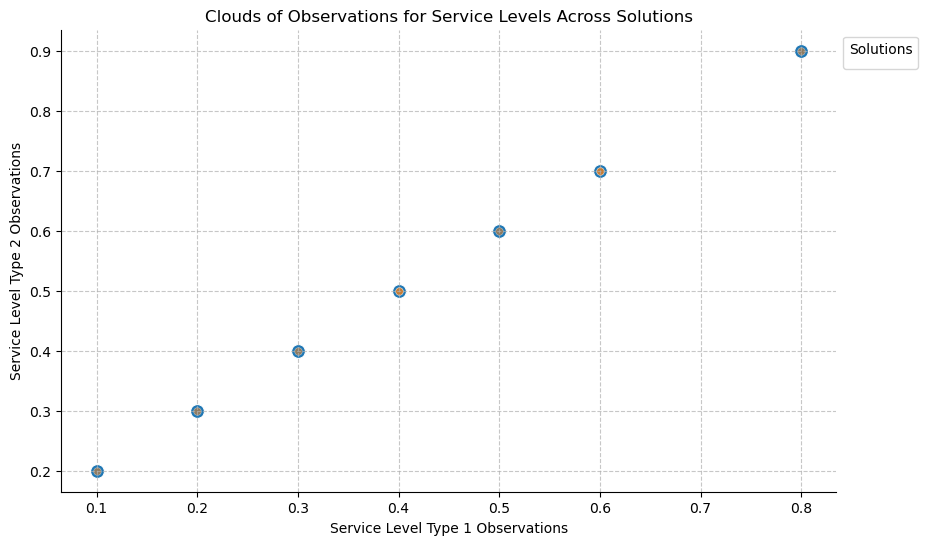

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_service_levels_clouds(solution_data):
    """
    Plot clouds of observations for two service level types across different solutions.

    Parameters:
    - solution_data (list of tuples): Each tuple contains two lists of observations for the two service level types in a solution.

    Returns:
    None
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    # Extract observations for each service level
    service_level1_data = [data[0] for data in solution_data]
    service_level2_data = [data[1] for data in solution_data]

    # Ensure all arrays have the same length
    max_length = max(len(arr) for arr in service_level1_data + service_level2_data)
    service_level1_data = [arr + [np.nan] * (max_length - len(arr)) for arr in service_level1_data]
    service_level2_data = [arr + [np.nan] * (max_length - len(arr)) for arr in service_level2_data]

    print(np.concatenate(service_level1_data))
    print(np.concatenate(service_level2_data))
    # print([f'Solution {i + 1}' for i in range(len(solution_data))])

    # Combine data into a DataFrame for the clustermap
    df = pd.DataFrame({'Service Level Type 1': np.concatenate(service_level1_data),
                       'Service Level Type 2': np.concatenate(service_level2_data)})
                    #    'Solution': [f'Solution {i + 1}' for i in range(len(solution_data))]})


    # Plot mean values for each solution
    sns.scatterplot(x='Service Level Type 1', y='Service Level Type 2', data=df, s=100, alpha=1, ax=ax)

    # Plot all observations in a smaller marker and a lighter tone
    sns.scatterplot(x='Service Level Type 1', y='Service Level Type 2', data=df, s=30, alpha=0.5, ax=ax)

    # # Add silhouette clusters using clustermap
    # sns.clustermap(df[['Service Level Type 1', 'Service Level Type 2']], col_cluster=False, figsize=(8, 5),
    #                cmap="vlag", standard_scale=1, ax=ax)

    # Set labels and title
    ax.set_xlabel('Service Level Type 1 Observations')
    ax.set_ylabel('Service Level Type 2 Observations')
    ax.set_title('Clouds of Observations for Service Levels Across Solutions')

    # Remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

    # Add legend
    ax.legend(title='Solutions', loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

# Example usage:
solution_data = [([0.2, 0.4, 0.6], [0.3, 0.5, 0.7]),
                 ([0.1, 0.3, 0.5], [0.2, 0.4, 0.6]),
                 ([0.4, 0.6, 0.8], [0.5, 0.7, 0.9])]

plot_service_levels_clouds(solution_data)
